In [1]:
%jsroot on
TFile *ipf = new TFile("root/gd128Agisomer_decaytime.root");
TCanvas *c1 = new TCanvas;
c1->SetLogy(0);

In [2]:
hadd->Draw("colz");
c1->Draw();

In [3]:
Double_t lambda[4];
Double_t Pb[3];
Double_t Pn[2];

Pb[0] = 1;//母核的beta衰变分支比
//Pn[0] = 1-Pb[0];//母核的beta-n衰变分支比
Pb[1] = Pb[0];//beta子核的beta衰变分支比
//Pn[1] = 1-Pb[1];//beta子核的beta-n衰变分支比
//Pb[2] = Pb[0];//beta-n子核的beta衰变分支比

lambda[0]=log(2)/280;//beta子核的衰变常数
//lambda[1]=log(2)/1090;//beta-n子核的衰变常数
lambda[2]=log(2)/840;//beta孙子核的衰变常数
//lambda[3]=log(2)/1090;//beta-n子核的beta子核的衰变常数

In [4]:
TString s1 = "[0]+[1]*TMath::Exp(-x*log(2)/[2])";
TString s2, s5, s3, s61, s62;
s2.Form("+ [1] * %f * %f * (TMath::Exp(-log(2)/[2] * x) / (%f - log(2)/[2]) + TMath::Exp(-%f * x) / (log(2)/[2] - %f))",
        Pb[0], lambda[0], lambda[0], lambda[0], lambda[0]);
/*
s5.Form("+ [1] * %f * %f * (TMath::Exp(-log(2)/[2] * x) / (%f - log(2)/[2]) + TMath::Exp(-%f * x) / (log(2)/[2] - %f))",
        Pn[0], lambda[1], lambda[1], lambda[1], lambda[1]);
*/
s3.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-log(2)/[2] * x) / ((%f - log(2)/[2])*(%f - log(2)/[2])) + TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f)))",
        Pb[0], Pb[1], lambda[0], lambda[2], lambda[0], lambda[2], lambda[0], lambda[0], lambda[2], lambda[0], lambda[2], lambda[2], lambda[0], lambda[2] );
/*
s61.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-log(2)/[2] * x) / ((%f - log(2)/[2])*(%f - log(2)/[2])) + TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f)))",
         Pb[0], Pn[1], lambda[0], lambda[3], lambda[0], lambda[3], lambda[0], lambda[0], lambda[3], lambda[0], lambda[3], lambda[3], lambda[0], lambda[3]);
s62.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-log(2)/[2] * x) / ((%f - log(2)/[2])*(%f - log(2)/[2])) + TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / ((log(2)/[2] - %f)*(%f - %f)))",
         Pn[0], Pb[2], lambda[1], lambda[3], lambda[1], lambda[3], lambda[1], lambda[1], lambda[3], lambda[1], lambda[3], lambda[3], lambda[1], lambda[3]);
*/

In [5]:
TF1 *f1 = new TF1("f1",s1+s2+s3,0,3000);  // parameter [2] is T1/2
f1->SetNpx(3000);

In [6]:
Int_t e,e1,e2;  // gate (e1,e2), name e
vector<int> b;  // background bin

In [7]:
void gate() // nbin: decaytime's bin; xmax: fit range (0,xmax)
{
    hadd->ProjectionX(Form("h%d",e),e1+1,e2+1);
    TH1F *hdt = (TH1F*)gROOT->FindObject(Form("h%d",e));
    TH1F *hbg = new TH1F(Form("hbg%d",e),"hbg",hadd->GetXaxis()->GetNbins(),0,hadd->GetXaxis()->GetXmax());
    for (unsigned int i=0; i<b.size(); i++){
        hadd->ProjectionX(Form("b%d",b[i]),b[i]+1,b[i]+1);
        TH1F *hbtemp = (TH1F*)gROOT->FindObject(Form("b%d",b[i]));
        hbg->Add(hbg,hbtemp,1,1);
    }
    double weight = (double)(e2-e1+1)/b.size();
    hdt->Add(hdt,hbg,1,-weight);
    
    f1->SetParameter(0,50);
    f1->SetParameter(1,100);
    f1->SetParameter(2,50);
    hdt->Fit("f1","R");
    hdt->Draw();
    c1->Draw();
    delete hbg;
}

In [8]:
hadd->ProjectionY("tpjx");
tpjx->Draw();
c1->Draw();

In [9]:
%jsroot off
c1->SetLogy(0);

## gate 538 keV

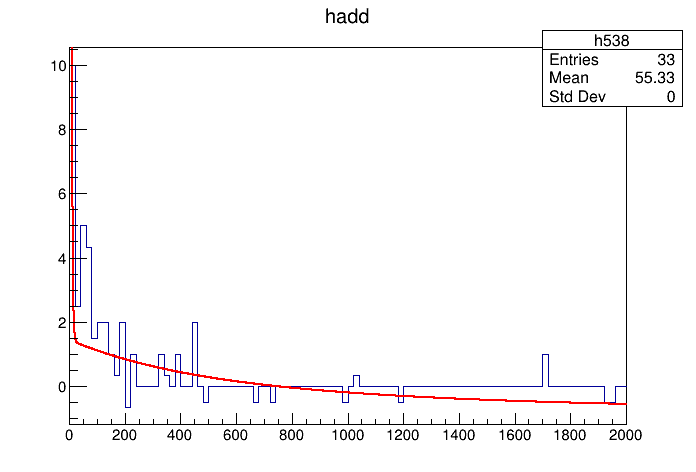

 FCN=19.3768 FROM MIGRAD    STATUS=CONVERGED     180 CALLS         181 TOTAL
                     EDM=1.07093e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -7.84917e-01   3.68160e-01   3.83126e-04  -4.37227e-04
   2  p1           3.23546e+02   1.54342e+02   9.47468e-02  -3.08201e-06
   3  p2           1.91509e+00   3.79651e-01   3.37979e-04  -7.63446e-04


In [10]:
e = 538;
e1 = 536;
e2 = 538;
b = {530,531,532,540,541,542};
gate();

## gate 238 keV 

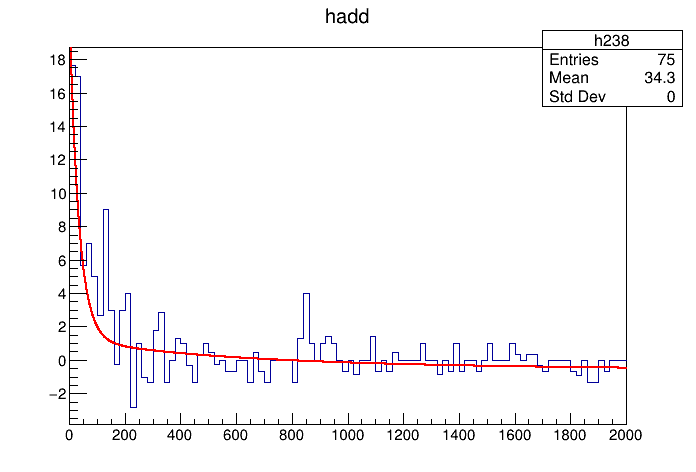

 FCN=83.2861 FROM MIGRAD    STATUS=CONVERGED     172 CALLS         173 TOTAL
                     EDM=1.08504e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -6.53174e-01   1.59110e-01   5.05285e-04  -9.24549e-05
   2  p1           2.25040e+01   5.52309e+00   1.10004e-02   7.53581e-06
   3  p2           2.30286e+01   4.80488e+00   9.84739e-03   1.20860e-05


In [11]:
e = 238;
e1 = 236;
e2 = 239;
b = {230,231,232,241,242,243};
gate();

## gate 440 keV

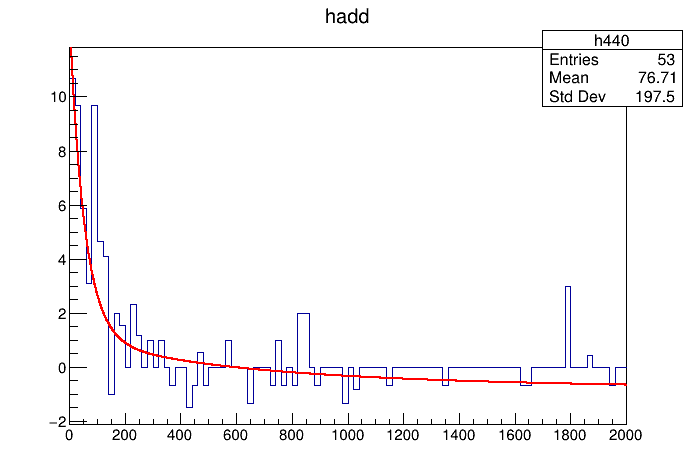

 FCN=39.7395 FROM MIGRAD    STATUS=CONVERGED     139 CALLS         140 TOTAL
                     EDM=1.00269e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -8.55387e-01   2.38551e-01   5.23606e-04  -2.34571e-03
   2  p1           1.41476e+01   3.64304e+00   5.18324e-03  -2.51895e-04
   3  p2           3.67614e+01   9.45126e+00   1.26777e-02  -9.84873e-05


In [12]:
e = 440;
e1 = 438;
e2 = 441;
b = {433,434,435,443,444,445};
gate();

## gate 200+527+1325 keV

In [13]:
%jsroot on
f1->FixParameter(0,0);
f1->SetParameter(1,50);
f1->SetParLimits(1,0,1000);
f1->SetParameter(2,20);

h538->Add(h538,h238,1,1);
h538->Add(h538,h440,1,1);
h538->Fit("f1","R","",0,600);
h538->Draw();
c1->Draw();

 FCN=174.333 FROM MIGRAD    STATUS=FAILED        100 CALLS         101 TOTAL
                     EDM=nan    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           0.00000e+00     fixed    
   2  p1           2.11239e+01           nan           nan   8.47672e-11
   3  p2           7.03749e-13           nan           nan          -inf


Warning in <Fit>: Abnormal termination of minimization.
